In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_log_error
from math import sqrt
import category_encoders as ce

from xgboost import XGBRegressor

from scipy import stats
from scipy.stats import norm, skew

%matplotlib inline

In [91]:
def rmsle(y_actual, y_prediced):
    '''Return the root mean squared logathmic error'''
    return sqrt(mean_squared_log_error(y_actual,y_prediced))

In [92]:
# It is your job to predict the sales price for each house. For each Id in the test set,
# you must predict the value of the SalePrice variable. 

In [126]:
df = pd.read_csv(r"../data/train.csv")
test_df = pd.read_csv(r"../data/test.csv")

In [94]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [127]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [95]:
df.index

RangeIndex(start=0, stop=1460, step=1)

In [96]:
null_series = df.isnull().sum()
null_series = null_series[null_series!=0]
null_series

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [97]:
df['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [98]:
# Data Preprocessing

In [99]:
# Outliers
def plot_outliers():
    fix, ax = plt.subplots()
    ax.scatter(x=df['GrLivArea'], y=df['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel('GrLivArea', fontsize=13)

In [100]:
df = df.drop(df[(df['GrLivArea']>4000)&(df['SalePrice']<300000)].index)

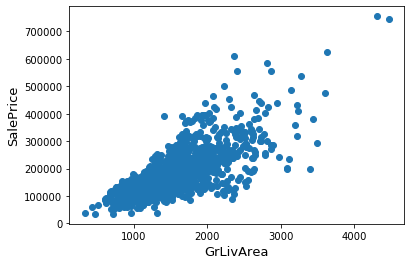

In [101]:
plot_outliers()


 mu = 180932.92 and sigma = 79467.79



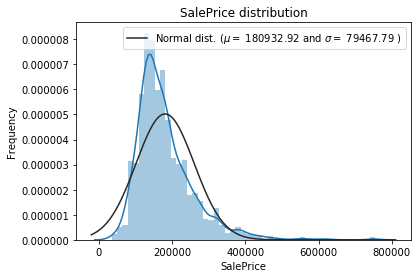

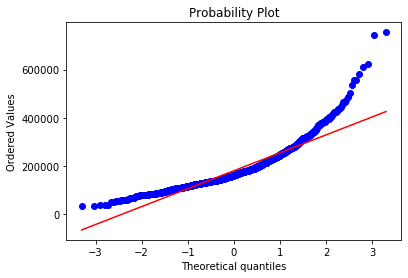

In [102]:
# Normally Distributed Target
sns.distplot(df['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



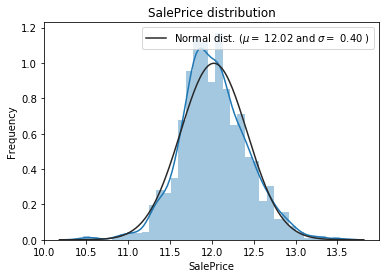

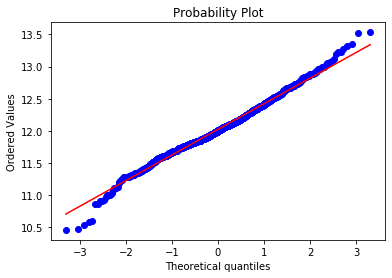

In [103]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [104]:
# Feature Engineering. Imputing missing data
# Let's first concat data
ntrain = df.shape[0]
ntest = test_df.shape[0]
y_train = df.SalePrice.values
all_data = pd.concat((df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice', 'Id'], axis=1,  inplace=True)
print('all data size is: {}'.format(all_data.shape))

all data size is: (2917, 79)


In [105]:
all_data.isnull().sum()/len(all_data)

MSSubClass       0.000000
MSZoning         0.001371
LotFrontage      0.166610
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
Length: 79, dtype: float64

In [106]:
# Missing data
def show_missing_ratio():
    all_data_na = (all_data.isnull().sum()/len(all_data))*100
    all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]

    na_df = pd.DataFrame({'Missing values':all_data_na})
    return na_df.head(10)
    
show_missing_ratio()

,Missing values
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


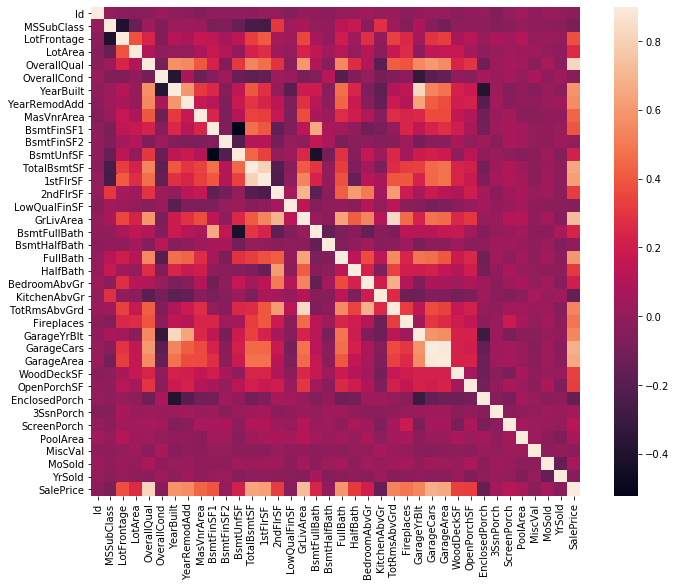

In [107]:
# Check for correlation between columns
corr = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True)

In [108]:
# Imputing missing values
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [109]:
show_missing_ratio()

,Missing values


In [110]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [111]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [112]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [113]:
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [114]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [115]:
skewness = skewness[abs(skewness)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [116]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [117]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [118]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [119]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [120]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



NameError: name 'y_test' is not defined

In [ ]:
rmsle(lasso.predict(test_df), )

In [11]:
# Checking for data leakage

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df.SalePrice)
for each in [y_train, y_test]:
    print(f"Outcome fraction is {each.mean():.4f}")

Outcome fraction is 180096.7479
Outcome fraction is 183394.5397


In [13]:
# Drop highly correlated columns
def list_to_remove(df):
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    return to_drop

to_drop = list_to_remove(df)

X_train.drop(X_train[to_drop], axis=1, inplace=True)
X_test.drop(X_test[to_drop], axis=1, inplace=True)
test_df.drop(test_df[to_drop], axis=1, inplace=True)


In [43]:
def train_model(X_train, y_train):
    xgb_regr = XGBRegressor(learning_rate=0.05, n_estimators=1000, max_depth=3, scoring='explained_variance',
                           early_stopping_rounds=50)

    numerical_cols = X_train.select_dtypes(exclude=['object']).columns
    categorical_cols = list(set(X_train.columns)-set(numerical_cols))

    numerical_transformer = SimpleImputer(strategy='constant')
    categorical_transformer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(categories='auto', handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    my_pipeline = Pipeline(steps=[('prep', preprocessor), ('model', xgb_regr)])
    estimator = my_pipeline.fit(X_train, y_train)

    #params = {'model__max_depth':[3]}
    #rand_search = RandomizedSearchCV(my_pipeline, params, scoring='explained_variance').fit(X_train, y_train)
    
    return estimator

In [44]:
encoders_list = [ce.CountEncoder(), ce.TargetEncoder(), ce.CatBoostEncoder()]
def count_encoding(X_train, y_train):
    categorical_cols = X_train.select_dtypes('object').columns.values.tolist()
    numerical_cols = set(X_train.columns.values.tolist()) - set(categorical_cols)
    encoder = ce.CountEncoder(cols = categorical_cols)
    
    encoder.fit(X_train[categorical_cols])
    encoded_train_data = encoder.transform(X_train[categorical_cols])
    encoded_test_data = encoder.transform(X_test[categorical_cols])
    
    train_data = X_train[numerical_cols].join(encoded_train_data)
    test_data = X_test[numerical_cols].join(encoded_test_data)
    
    model = train_model(train_data, y_train)
    score = rmsle(model.predict(test_data), y_test)
    
    return score

#def target_encoding(X_train, y_train):
    

In [45]:
count_encoding(X_train, y_train)

C:\Miniconda\lib\site-packages\category_encoders\count.py:255: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  X.loc[:, self.cols] = X.fillna(value=pd.np.nan)


[09:11:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.14332198412940952

In [ ]:
# Defining an XGBRegressor and fitting model
# xgb_regr = XGBRegressor(learning_rate=0.05, n_estimators=1000, max_depth=3, scoring='explained_variance')

# numerical_cols = X_train.select_dtypes(exclude=['object']).columns
# categorical_cols = list(set(X_train.columns)-set(numerical_cols))

# numerical_transformer = SimpleImputer(strategy='constant')
# categorical_transformer = Pipeline(steps=[
#     ('impute', SimpleImputer(strategy='most_frequent')),
#     ('encode', OneHotEncoder(categories='auto', handle_unknown='ignore'))])
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])
# my_pipeline = Pipeline(steps=[('prep', preprocessor), ('model', xgb_regr)])
# my_pipeline.fit(X_train, y_train)

#params = {'n_estimators':range(100,1000,10), 'max_depth':range(10,200,10)}
#rand_search = RandomizedSearchCV(xgb_regr, params, scoring='explained_variance')
#xgb_regr.fit(imputed_X_train, y_train, early_stopping_rounds=500, eval_set=[(imputed_X_test, y_test)], verbose=False)

In [34]:
best_regr = my_pipeline

In [35]:
explained_variance_score(y_test, best_regr.predict(X_test))

0.9138046944527398

In [65]:
rmsle(y_test, best_est.predict(X_test))

0.12381990736772613

In [36]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [37]:
# Submission
submission = pd.DataFrame({'Id':test_df.Id, 'SalePrice':best_regr.predict(test_df)})

In [38]:
submission.to_csv('submission.csv', index=False)

In [39]:
pd.read_csv('submission.csv')

,Id,SalePrice
0,1461,124085.750
1,1462,165754.770
2,1463,178770.890
3,1464,199453.340
4,1465,180778.690
...,...,...
1454,2915,84533.336
1455,2916,66144.555
1456,2917,176682.670
1457,2918,124474.160


In [37]:
# A little report of what I did.
# So making train test split, cross validation and testing model by hand worked okay. But using the Pipeline
# and making it all together automated helped me to improve the model score by a huge amount.

In [ ]:
# Some tips what I can do now to improve my score
# 1. Check the score of model using Root Mean Squared Error
# 2. Write some functions instead of simple lines
# 3. Try different ways of encoding the features
# 4. Make some feature generation
# 5. Make some feature selection using LinearRegression and SelectFromModel
# 6. Make a baseline model